In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf 
import cv2 
from google.colab.patches import cv2_imshow
import os

In [ ]:
rm /root/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
! mkdir -p /root/.kaggle

In [ ]:
! mv kaggle.json /root/.kaggle

In [ ]:
import kaggle

In [ ]:
! mv kaggle.json /root/.kaggle

mv: cannot stat 'kaggle.json': No such file or directory


In [ ]:
!kaggle competitions download -c plant-pathology-2020-fgvc7

 98% 761M/779M [00:06<00:00, 131MB/s]
100% 779M/779M [00:06<00:00, 119MB/s]


In [ ]:
! unzip -q plant-pathology-2020-fgvc7.zip

In [ ]:
import os
os.listdir('images')[:10]

['Test_99.jpg',
 'Test_1039.jpg',
 'Test_1752.jpg',
 'Test_1808.jpg',
 'Train_1066.jpg',
 'Test_1601.jpg',
 'Test_367.jpg',
 'Train_889.jpg',
 'Train_368.jpg',
 'Test_1708.jpg']

In [ ]:
image_data = []
images_data = os.listdir("images")
len(images_data)

3642

In [ ]:
import shutil

In [ ]:
! ls images | grep Test | wc -l

1821


In [ ]:
! ls images | grep Test | wc -l

1821


In [ ]:
os.mkdir("trainimages")


In [ ]:
os.mkdir("testimages")

In [ ]:
import shutil
from shutil import copy

In [ ]:
source = "images/"
desttrain = "trainimages/"
desttest = "testimages/"
for image in os.listdir("images"):
  if "Train" in image:
    copy(source + image, desttrain + image)
  else:
    copy(source + image, desttest + image)

In [ ]:
len(os.listdir('/content/trainimages'))

1821

In [ ]:
len(os.listdir('/content/testimages'))

1821

In [ ]:
label_data = pd.read_csv('train.csv')
label_data

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0,0,0,0,1
1,Train_1,0,1,0,0
2,Train_2,1,0,0,0
3,Train_3,0,0,1,0
4,Train_4,1,0,0,0
...,...,...,...,...,...
1816,Train_1816,0,0,0,1
1817,Train_1817,1,0,0,0
1818,Train_1818,1,0,0,0
1819,Train_1819,0,0,1,0


In [ ]:
label_data['image_id'] = label_data['image_id']+".jpg"
label_data

,image_id,healthy,multiple_diseases,rust,scab
0,Train_0.jpg,0,0,0,1
1,Train_1.jpg,0,1,0,0
2,Train_2.jpg,1,0,0,0
3,Train_3.jpg,0,0,1,0
4,Train_4.jpg,1,0,0,0
...,...,...,...,...,...
1816,Train_1816.jpg,0,0,0,1
1817,Train_1817.jpg,1,0,0,0
1818,Train_1818.jpg,1,0,0,0
1819,Train_1819.jpg,0,0,1,0


In [ ]:
#label_data['h'] = label_data.replace({'healthy': {0:'No', 1: 'Yes'}})

label_data ['h'] = label_data['healthy'].map({1: "Yes", 0: "No"})

#df['Insurance'] = df['Insurance'].map({'yes': 1, 'no': 0})                        'no': False}})

In [ ]:
label_data

,image_id,healthy,multiple_diseases,rust,scab,h
0,Train_0.jpg,0,0,0,1,No
1,Train_1.jpg,0,1,0,0,No
2,Train_2.jpg,1,0,0,0,Yes
3,Train_3.jpg,0,0,1,0,No
4,Train_4.jpg,1,0,0,0,Yes
...,...,...,...,...,...,...
1816,Train_1816.jpg,0,0,0,1,No
1817,Train_1817.jpg,1,0,0,0,Yes
1818,Train_1818.jpg,1,0,0,0,Yes
1819,Train_1819.jpg,0,0,1,0,No


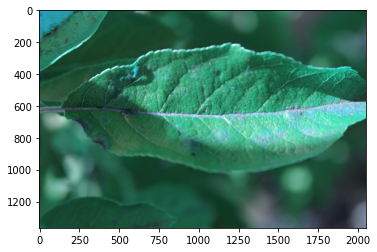

In [ ]:
i = cv2.imread('images/Train_1820.jpg')
plt.imshow(i)

In [ ]:
os.listdir('testimages')[:10]

['Test_99.jpg',
 'Test_1039.jpg',
 'Test_1752.jpg',
 'Test_1808.jpg',
 'Test_1601.jpg',
 'Test_367.jpg',
 'Test_1708.jpg',
 'Test_652.jpg',
 'Test_1211.jpg',
 'Test_908.jpg']

In [ ]:
gen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255.0, validation_split=0.2)

In [ ]:
train_gen = gen.flow_from_dataframe(dataframe= label_data, 
                                    directory="/content/trainimages", 
                                    x_col='image_id', 
                                    y_col='h', 
                                    target_size=(100, 100), 
                                    batch_size=32, 
                                    subset="training")

Found 1457 validated image filenames belonging to 2 classes.


In [ ]:
val_gen = gen.flow_from_dataframe(dataframe= label_data, 
                                    directory="/content/trainimages", 
                                    x_col='image_id', 
                                    y_col='h', 
                                    target_size=(100, 100), 
                                    batch_size=32, 
                                    subset="validation")

Found 364 validated image filenames belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Input((100, 100, 3)))
# chunk 1
model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# chunk 2 
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# FCNN 
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(240, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 98, 98, 16)        448       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 49, 49, 16)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 47, 47, 32)        4640      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 16928)             0         
                                                                 
 dense_2 (Dense)             (None, 240)              

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.categorical_crossentropy, metrics = ["acc"])

In [ ]:
model_history = model.fit(train_gen,batch_size=32, epochs=15, validation_data = val_gen)

Epoch 1/15
46/46 [==============================] - 81s 2s/step - loss: 0.6222 - acc: 0.7028 - val_loss: 0.6492 - val_acc: 0.7198
Epoch 2/15
46/46 [==============================] - 78s 2s/step - loss: 0.5936 - acc: 0.7152 - val_loss: 0.5351 - val_acc: 0.7582
Epoch 3/15
46/46 [==============================] - 77s 2s/step - loss: 0.5989 - acc: 0.7097 - val_loss: 0.5397 - val_acc: 0.7582
Epoch 4/15
46/46 [==============================] - 80s 2s/step - loss: 0.5837 - acc: 0.7117 - val_loss: 0.5292 - val_acc: 0.7582
Epoch 5/15
46/46 [==============================] - 77s 2s/step - loss: 0.5827 - acc: 0.7159 - val_loss: 0.5300 - val_acc: 0.7637
Epoch 6/15
46/46 [==============================] - 79s 2s/step - loss: 0.5670 - acc: 0.7248 - val_loss: 0.5172 - val_acc: 0.7582
Epoch 7/15
46/46 [==============================] - 79s 2s/step - loss: 0.5735 - acc: 0.7234 - val_loss: 0.5407 - val_acc: 0.7912
Epoch 8/15
46/46 [==============================] - 77s 2s/step - loss: 0.5678 - acc: 0.73

In [ ]:
model.evaluate(val_gen)

12/12 [==============================] - 14s 1s/step - loss: 0.5131 - acc: 0.7912


[0.513128399848938, 0.791208803653717]